In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')


In [2]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end = end)

/tmp/ipython-input-3605710231.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock, start=start, end = end)
[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [4]:
stock_data.tail()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-08-29,108410.835938,112619.054688,107559.625000,112550.523438,77843379644
2025-08-30,108808.070312,108929.351562,107444.445312,108409.406250,51486264208
2025-08-31,108236.710938,109491.000000,108104.656250,108818.460938,47986191770
2025-09-01,109250.593750,109890.585938,107271.179688,108228.750000,66870372995
2025-09-02,110960.929688,111653.531250,108540.929688,109243.296875,72663056384


In [5]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,4004.0,2.456694e+04,2.912961e+04,1.781030e+02,2.474982e+03,1.024181e+04,3.895247e+04,1.233441e+05
High,BTC-USD,4004.0,2.505138e+04,2.962872e+04,2.117310e+02,2.539230e+03,1.043945e+04,3.989119e+04,1.244571e+05
Low,BTC-USD,4004.0,2.400633e+04,2.855268e+04,1.715100e+02,2.338870e+03,9.971749e+03,3.770549e+04,1.189592e+05
Open,BTC-USD,4004.0,2.454047e+04,2.910114e+04,1.768970e+02,2.463738e+03,1.023515e+04,3.888525e+04,1.233394e+05
Volume,BTC-USD,4004.0,2.049448e+10,2.183341e+10,5.914570e+06,1.059482e+09,1.642862e+10,3.193457e+10,3.509679e+11


In [6]:
stock_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4004 entries, 2014-09-17 to 2025-09-02
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   4004 non-null   float64
 1   (High, BTC-USD)    4004 non-null   float64
 2   (Low, BTC-USD)     4004 non-null   float64
 3   (Open, BTC-USD)    4004 non-null   float64
 4   (Volume, BTC-USD)  4004 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 187.7 KB


In [7]:
stock_data.columns


MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [8]:
closing_price = stock_data[['Close']]


In [9]:
closing_price['Close']


Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-08-29,108410.835938
2025-08-30,108808.070312
2025-08-31,108236.710938


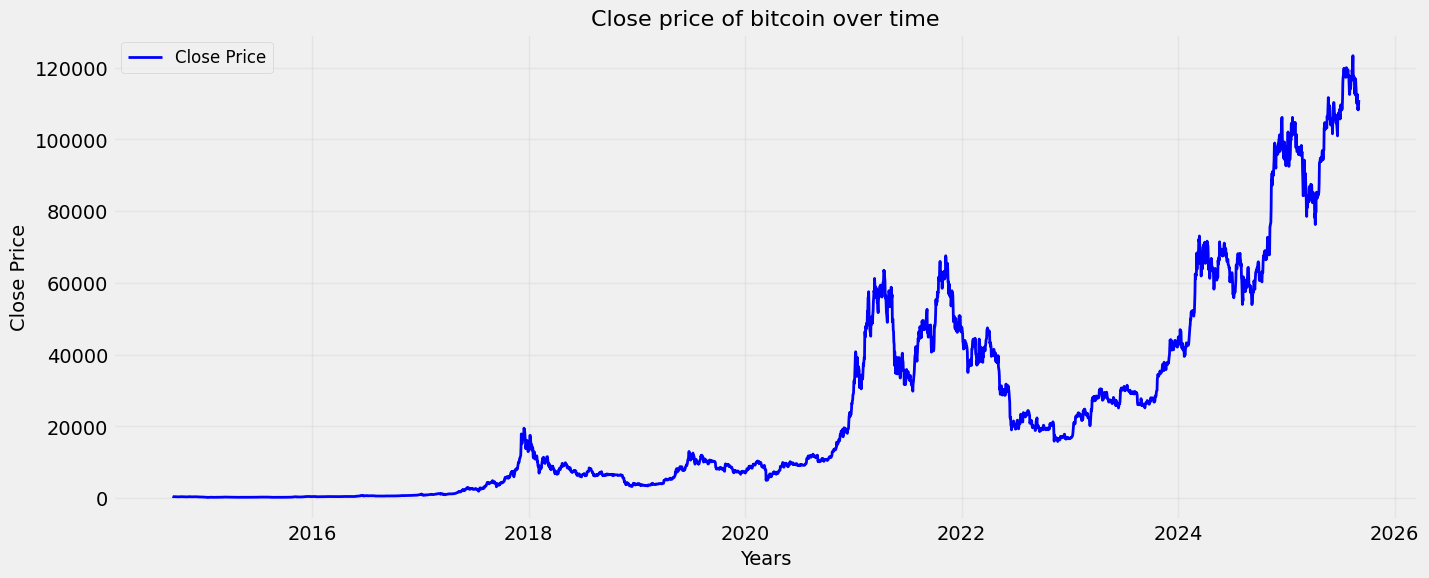

In [10]:
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [11]:
for i in range(2014, 2024):
    print(i, list(stock_data.index.year).count(i))


2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [12]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


/tmp/ipython-input-2488011666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
/tmp/ipython-input-2488011666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


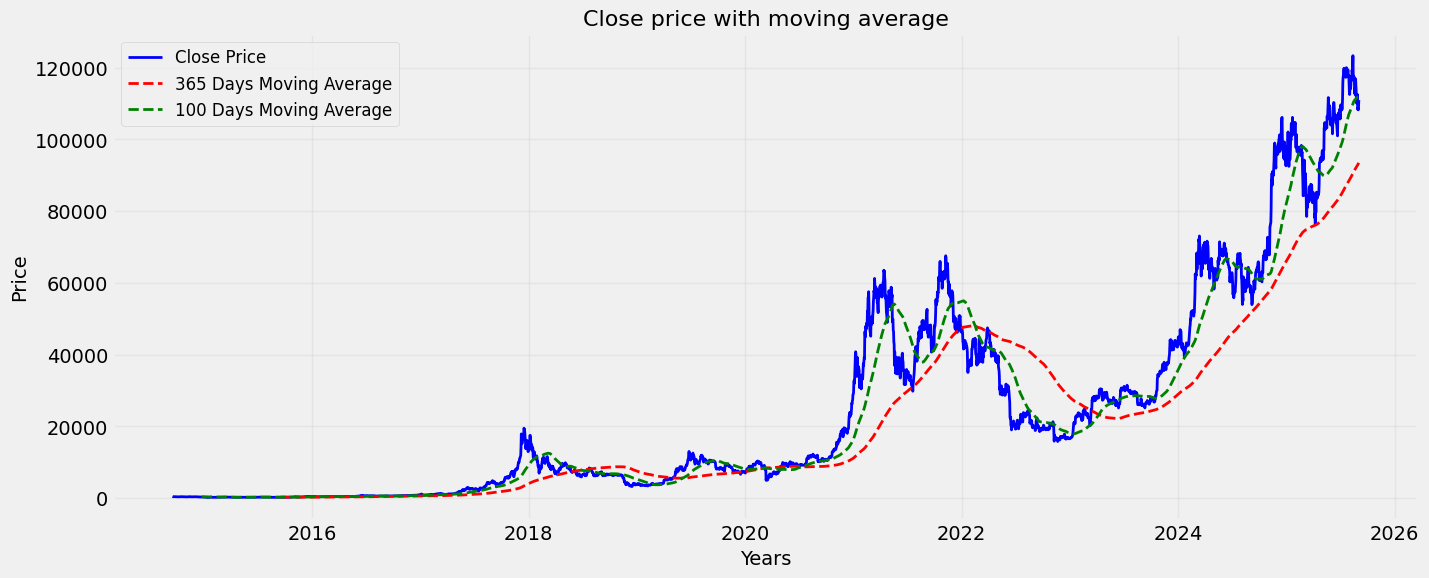

In [13]:
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())


In [15]:
len(scaled_data)

4004

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [17]:
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)


In [18]:
train_size = int(len(x_data) * 0.8)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]


In [19]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0021
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 2.2030e-04
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4934e-04
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.4585e-04
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 9.3832e-05
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1.0206e-04
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 8.4420e-05
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 7.8573e-05
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 7.7066e-05
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.0774e-04


In [21]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


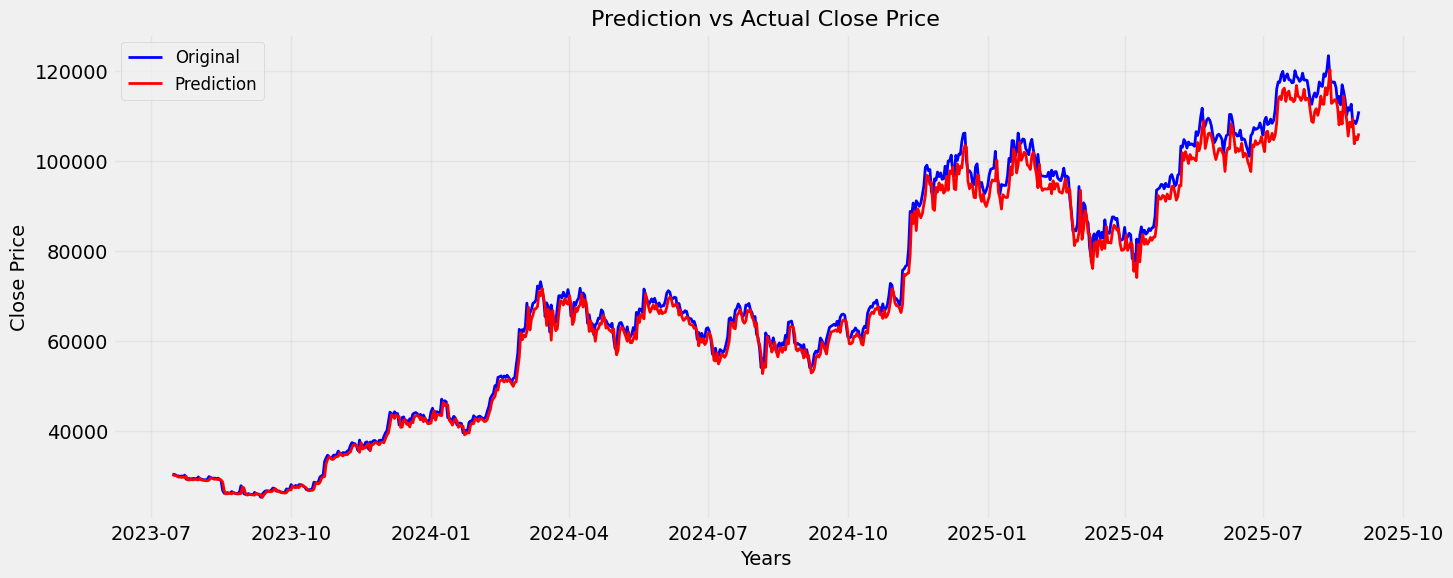

In [22]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()


In [23]:
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [24]:
future_predictions


[array([[107956.71]], dtype=float32),
 array([[103729.04]], dtype=float32),
 array([[99245.89]], dtype=float32),
 array([[94929.77]], dtype=float32),
 array([[90927.375]], dtype=float32),
 array([[87261.12]], dtype=float32),
 array([[83905.15]], dtype=float32),
 array([[80823.98]], dtype=float32),
 array([[77987.33]], dtype=float32),
 array([[75372.664]], dtype=float32)]

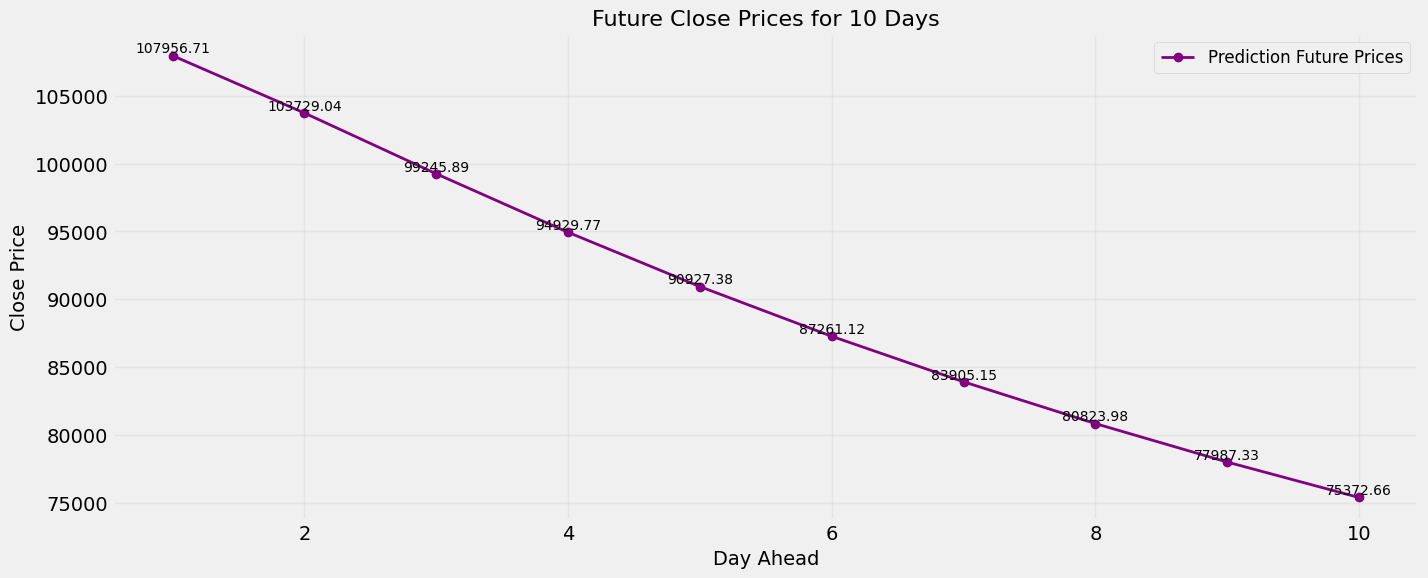

In [25]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()


In [26]:
model.save("lstm_model.h5")


In [28]:
import os
import numpy as np
import pandas as pd
from collections import deque
import gym
from gym import spaces
import torch
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import EvalCallback, CheckpointCallback
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [29]:
def load_lstm_model():
    keras_path = 'lstm_model.h5'
    pytorch_path = 'lstm_model.pth'

    # Try to load Keras model
    if os.path.exists(keras_path):
        try:
            model = load_model(keras_path)
            model_type = 'keras'
            print('Loaded Keras LSTM from', keras_path)
            return model, model_type
        except Exception as e:
            print('Failed to load Keras model:', e)

    # Try to load PyTorch model
    if os.path.exists(pytorch_path):
        try:
            model = torch.load(pytorch_path, map_location=torch.device('cpu'))
            model_type = 'pytorch'
            print('Loaded PyTorch model from', pytorch_path)
            return model, model_type
        except Exception as e:
            print('Failed to load PyTorch model:', e)

    print('No LSTM model file found. Continuing without LSTM feature extractor.')
    return None, None


In [30]:
def lstm_feature_from_window(model_tuple, window):
    model, mtype = model_tuple
    if model is None:
        # no model: return simple features (mean, std, last price)
        return np.array([window[-1, 0], window.mean(), window.std()])

    if mtype == 'keras':
        # Keras model expects batch dimension
        x = window.reshape((1,) + window.shape)
        # If your keras model outputs a sequence, you may want the last timestep.
        try:
            out = model.predict(x, verbose=0)
            out = np.asarray(out).ravel()
            return out
        except Exception as e:
            print('Keras predict failed:', e)
            return np.array([window[-1, 0]])

    if mtype == 'pytorch':
        try:
            model.eval()
            with torch.no_grad():
                # Convert to tensor: shape (1, seq_len, features) or adapt as needed
                x = torch.tensor(window, dtype=torch.float32).unsqueeze(0)
                out = model(x)
                if isinstance(out, tuple):
                    out = out[0]
                out = out.cpu().numpy().ravel()
                return out
        except Exception as e:
            print('PyTorch model inference failed:', e)
            return np.array([window[-1, 0]])

    return np.array([window[-1, 0]])


In [31]:
class TradingEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, df, window_size=50, initial_balance=1e4, model_tuple=(None, None), transaction_cost_pct=0.0005):
        super(TradingEnv, self).__init__()
        self.df = df.reset_index(drop=True).copy()
        self.window_size = window_size
        self.initial_balance = initial_balance
        self.transaction_cost_pct = transaction_cost_pct
        self.model_tuple = model_tuple

        # action: discrete 3
        self.action_space = spaces.Discrete(3)

        # observation space: we'll build an array of size (window_size * n_features) + len(lstm_features)
        self.n_features = 1  # assume df['Close'] only; extend if you have more
        # placeholder for lstm feature dim: we'll infer at reset once
        self.obs_dim = self.window_size * self.n_features + 10
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_dim,), dtype=np.float32)

        self._reset_internal()

    def _reset_internal(self):
        self.current_step = self.window_size
        self.balance = self.initial_balance
        self.position = 0  # 0 = flat, 1 = long
        self.avg_price = 0.0
        self.net_worth = self.initial_balance
        self.trades = 0
        self.done = False

    def reset(self):
        self._reset_internal()
        return self._get_observation()

    def _get_window(self):
        start = self.current_step - self.window_size
        window = self.df.loc[start:self.current_step - 1, 'Close'].values.astype(float)
        # reshape to (window_size, n_features)
        window = window.reshape((-1, self.n_features))
        return window

    def _get_observation(self):
        window = self._get_window()
        lstm_feats = lstm_feature_from_window(self.model_tuple, window)
        # flatten window
        flat = window.ravel()
        obs = np.concatenate([flat, lstm_feats])
        # pad if needed
        if obs.shape[0] < self.observation_space.shape[0]:
            pad = np.zeros(self.observation_space.shape[0] - obs.shape[0])
            obs = np.concatenate([obs, pad])
        else:
            obs = obs[:self.observation_space.shape[0]]
        return obs.astype(np.float32)

    def step(self, action):
        if self.done:
            return self._get_observation(), 0.0, self.done, {}

        current_price = float(self.df.loc[self.current_step, 'Close'])
        reward = 0.0

        # Actions: 0=hold,1=buy(long),2=sell(close/short not implemented)
        if action == 1 and self.position == 0:
            # enter long with entire balance
            self.position = 1
            self.avg_price = current_price
            self.shares = self.balance / current_price
            cost = self.balance * self.transaction_cost_pct
            self.balance -= cost
            self.trades += 1

        elif action == 2 and self.position == 1:
            # close long
            proceeds = self.shares * current_price
            cost = proceeds * self.transaction_cost_pct
            self.balance = proceeds - cost
            profit = self.balance - self.initial_balance
            reward = profit
            self.position = 0
            self.trades += 1

        # update net worth if still holding
        if self.position == 1:
            self.net_worth = self.shares * current_price
        else:
            self.net_worth = self.balance

        # step forward
        self.current_step += 1
        if self.current_step >= len(self.df) - 1:
            self.done = True

        obs = self._get_observation()
        return obs, float(reward), self.done, {}

    def render(self, mode='human'):
        print(f'Step: {self.current_step}, NetWorth: {self.net_worth:.2f}, Position: {self.position}')



In [32]:
if 'stock_data' in globals():
    df_prices = stock_data.reset_index()[['Close']].copy()
elif 'closing_price' in globals():
    df_prices = closing_price.reset_index()[['Close']].copy()
elif os.path.exists('prices.csv'):
    df_prices = pd.read_csv('prices.csv')[['Close']].copy()
else:
    raise RuntimeError('No price DataFrame found. Make sure `stock_data` or `closing_price` exists or save prices.csv with Close column.')

model_tuple = load_lstm_model()  # tries keras h5 then pytorch pth


Loaded Keras LSTM from lstm_model.h5


In [35]:
env_fn = lambda: TradingEnv(df_prices, window_size=50, initial_balance=1e4, model_tuple=model_tuple)
vec_env = DummyVecEnv([env_fn])

# instantiate agent
agent = PPO('MlpPolicy', vec_env, verbose=1)

# Callbacks
checkpoint_cb = CheckpointCallback(save_freq=5000, save_path='./models/', name_prefix='ppo_trading')
eval_env = DummyVecEnv([env_fn])
eval_cb = EvalCallback(eval_env, best_model_save_path='./models/best/', eval_freq=5000, n_eval_episodes=1)

# Train
agent.learn(total_timesteps=20000, callback=[checkpoint_cb, eval_cb])

# save
agent.save('ppo_trading_agent')


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cuda device


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/tmp/ipython-input-3538174420.py:61: FutureWarning: Calling float on a single e

-----------------------------
| time/              |      |
|    fps             | 13   |
|    iterations      | 1    |
|    time_elapsed    | 152  |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 2             |
|    time_elapsed         | 301           |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 1.6464823e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.1          |
|    explained_variance   | -1.19e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 1.33e+09      |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000175     |
|    value_loss           | 3.64e+09      |
------------------------------------------

/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5000, episode_reward=3628458.37 +/- 0.00
Episode length: 3953.00 +/- 0.00
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 3.95e+03      |
|    mean_reward          | 3.63e+06      |
| time/                   |               |
|    total_timesteps      | 5000          |
| train/                  |               |
|    approx_kl            | 1.2702367e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.1          |
|    explained_variance   | 1.19e-07      |
|    learning_rate        | 0.0003        |
|    loss                 | 3.65e+10      |
|    n_updates            | 20            |
|    policy_gradient_loss | -4.98e-05     |
|    value_loss           | 6.52e+10      |
-------------------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 8    |
|  

/tmp/ipython-input-3538174420.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(self.df.loc[self.current_step, 'Close'])


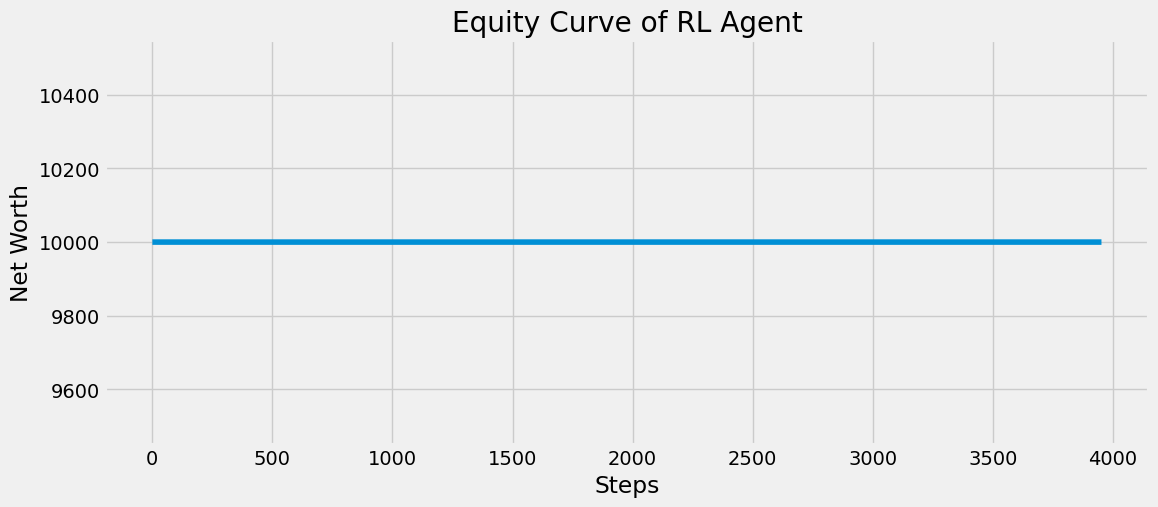

Final net worth: 10000.0


In [37]:
env = env_fn()
obs = env.reset()
net_worths = [env.net_worth]
steps = 0
while True:
    action, _states = agent.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(int(action))
    net_worths.append(env.net_worth)
    steps += 1
    if done:
        break

plt.figure(figsize=(12,5))
plt.plot(net_worths)
plt.title('Equity Curve of RL Agent')
plt.xlabel('Steps')
plt.ylabel('Net Worth')
plt.show()

print('Final net worth:', net_worths[-1])


/tmp/ipython-input-4178224825.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  initial_price = float(df_prices.loc[0, 'Close'])
/tmp/ipython-input-4178224825.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  final_price = float(df_prices.loc[len(net_worths)-1, 'Close']) if len(df_prices) >= len(net_worths) else float(df_prices['Close'].iloc[-1])


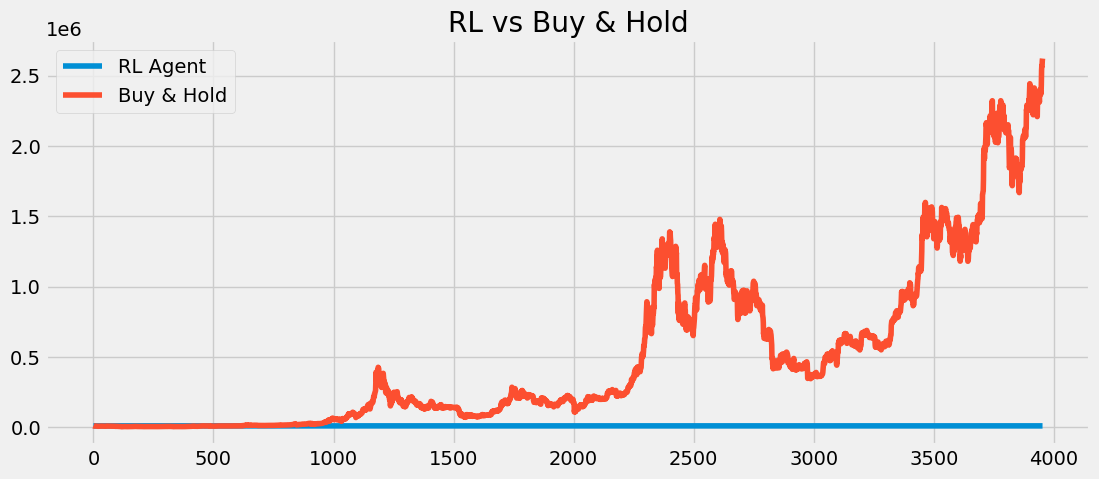

In [38]:
initial_price = float(df_prices.loc[0, 'Close'])
final_price = float(df_prices.loc[len(net_worths)-1, 'Close']) if len(df_prices) >= len(net_worths) else float(df_prices['Close'].iloc[-1])

# simple buy & hold equity curve
bh_shares = 1e4 / initial_price
bh_equity = df_prices['Close'].iloc[:len(net_worths)].values * bh_shares

plt.figure(figsize=(12,5))
plt.plot(net_worths, label='RL Agent')
plt.plot(bh_equity, label='Buy & Hold')
plt.legend()
plt.title('RL vs Buy & Hold')
plt.show()
